In [2]:
import os
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

#### Functions to load Training Data and Testing Data

In [3]:
def load_training_data():
    f_image = open('../data/train-images-idx3-ubyte', 'rb')
    f_label = open('../data/train-labels-idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Training Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Training Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label


def load_testing_data():
    f_image = open('../data/t10k-images-idx3-ubyte', 'rb')
    f_label = open('../data/t10k-labels-idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Testing Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Testing Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label

#### Loading Training and Testing Data

In [4]:
train_image_data, train_image_label = load_training_data()
test_image_data, test_image_label = load_testing_data()

Training Image Data:
2051 60000 28 28
(47040000,) 

Training Image Label:
2049 60000
(60000,) 

Testing Image Data:
2051 10000 28 28
(7840000,) 

Testing Image Label:
2049 10000
(10000,) 



9


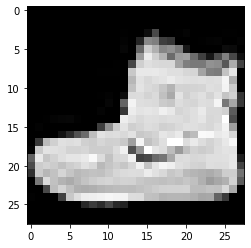

In [5]:
plt.imshow(train_image_data[0], cmap='gray');
print(train_image_label[0])

7


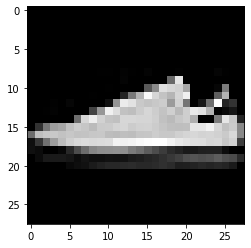

In [6]:
plt.imshow(train_image_data[6], cmap='gray');
print(train_image_label[6])

0


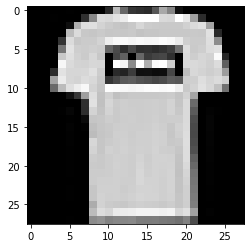

In [7]:
plt.imshow(train_image_data[1], cmap='gray');
print(train_image_label[1])

0


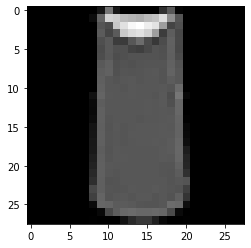

In [8]:
plt.imshow(train_image_data[2], cmap='gray');
print(train_image_label[2])

# Q3 (Section-C)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier

In [10]:
train_image, valid_image, train_label, valid_label = train_test_split(
                            train_image_data, train_image_label, test_size=0.15) 

In [11]:
print(train_image.shape)
print(valid_image.shape)
print(train_label.shape)
print(valid_label.shape)

(51000, 28, 28)
(9000, 28, 28)
(51000,)
(9000,)


#### All the output label classes

In [12]:
pd.Series(train_image_label).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [13]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

## Part (a)

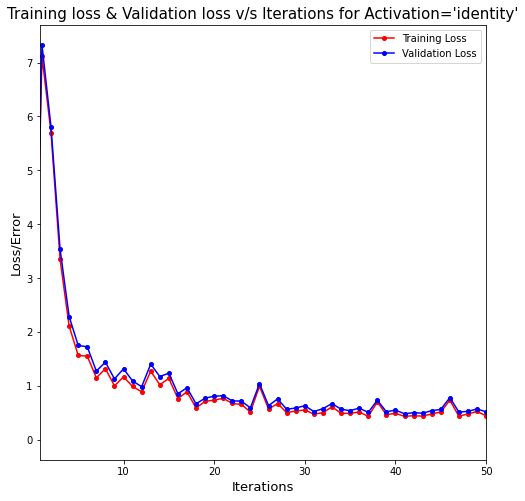

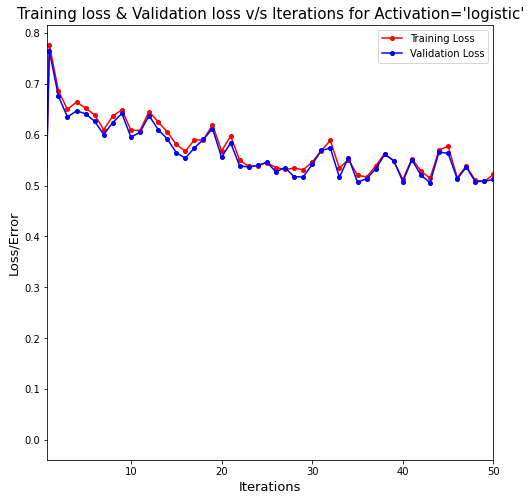

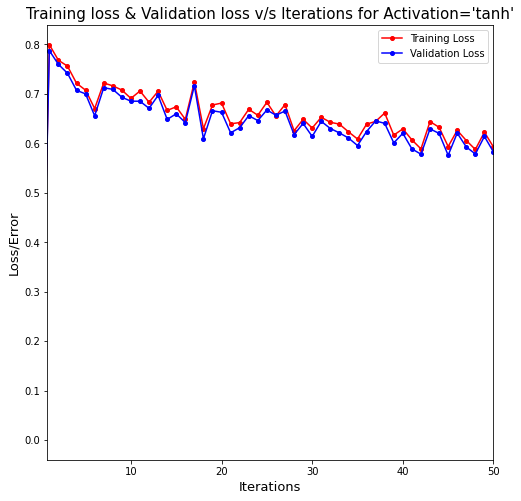

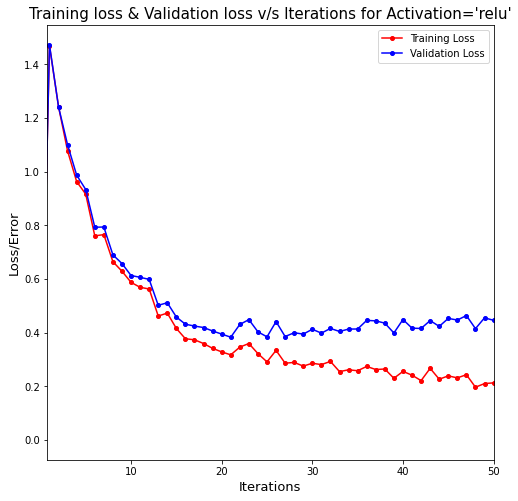

In [ ]:
def MLP_activations(activation:str, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    thresh = 0.001 if activation=='relu' else 0

    mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation=activation, batch_size=batch_size)
    
    for epoch in range(epochs):
        nsamples, nrows, ncols = x_train.shape
        mlp.partial_fit(x_train.reshape((nsamples, nrows*ncols)), y_train, classes=np.arange(10))
        
        # train_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_train, y=y_train, thresh=thresh))
        # validation_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_valid, y=y_valid, thresh=thresh))

        nsamples, nrows, ncols = x_train.shape
        y_true = np.eye(10)[y_train]
        y_pred_proba = mlp.predict_proba(x_train.reshape((nsamples, nrows*ncols)))
        train_loss.append(log_loss(y_true, y_pred_proba))
        
        nsamples, nrows, ncols = x_valid.shape
        y_true = np.eye(10)[y_valid]
        y_pred_proba = mlp.predict_proba(x_valid.reshape((nsamples, nrows*ncols)))
        validation_loss.append(log_loss(y_true, y_pred_proba))
    
    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss', ms=4)
    plt.plot(validation_loss, 'b-o', label='Validation Loss', ms=4)
    plt.xlabel('Iterations',fontsize=13)
    plt.ylabel('Loss/Error',fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f"Training loss & Validation loss v/s Iterations for Activation='{activation}'",fontsize=15)
    plt.legend()
    plt.show()
    return mlp

epochs = 50
batch_size = 128
models_activation = []

for activations in ['identity', 'logistic', 'tanh', 'relu']:
    mlp = MLP_activations(activations, epochs, batch_size, train_image, train_label, valid_image, valid_label)
    models_activation.append(mlp)

In [ ]:
activations = ['identity', 'logistic', 'tanh', 'relu']

for i in range(len(activations)):
    print(f"==> Accuracy on activation fucntion = '{activations[i]}'")
    nsamples, nrows, ncols = train_image.shape
    print(f"Training Accuracy :", models_activation[i].score(train_image.reshape((nsamples, nrows*ncols)),
                                                                train_label))
    nsamples, nrows, ncols = valid_image.shape
    print(f"Validation Accuracy :", models_activation[i].score(valid_image.reshape((nsamples, nrows*ncols)), 
                                                                valid_label))
    print()

==> Accuracy on activation fucntion = 'identity'
Training Accuracy : 0.8472549019607843
Validation Accuracy : 0.8371111111111111

==> Accuracy on activation fucntion = 'logistic'
Training Accuracy : 0.8115490196078431
Validation Accuracy : 0.8167777777777778

==> Accuracy on activation fucntion = 'tanh'
Training Accuracy : 0.7748039215686274
Validation Accuracy : 0.7775555555555556

==> Accuracy on activation fucntion = 'relu'
Training Accuracy : 0.9280392156862745
Validation Accuracy : 0.8836666666666667



In [ ]:
.

## Part (b)

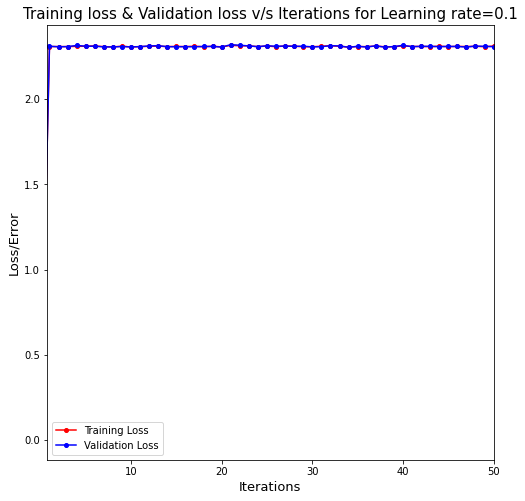

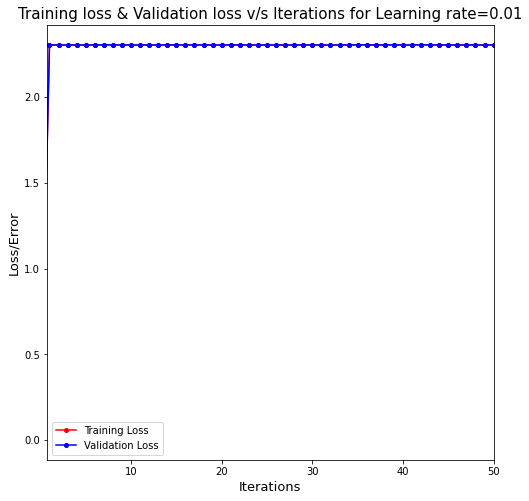

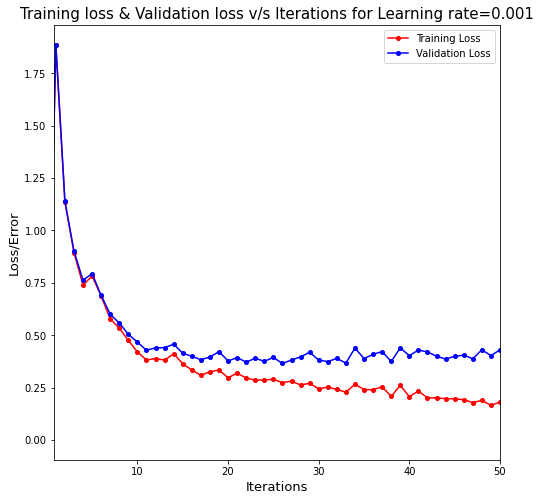

In [ ]:
def MLP_learning_rate(lr:int, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    
    mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu', learning_rate_init=lr,
                        batch_size=batch_size)
    
    for epoch in range(epochs):
        nsamples, nrows, ncols = x_train.shape
        mlp.partial_fit(x_train.reshape((nsamples, nrows*ncols)), y_train, classes=np.arange(10))
            
        nsamples, nrows, ncols = x_train.shape
        y_true = np.eye(10)[y_train]
        y_pred_proba = mlp.predict_proba(x_train.reshape((nsamples, nrows*ncols)))
        train_loss.append(log_loss(y_true, y_pred_proba))
        
        nsamples, nrows, ncols = x_valid.shape
        y_true = np.eye(10)[y_valid]
        y_pred_proba = mlp.predict_proba(x_valid.reshape((nsamples, nrows*ncols)))
        validation_loss.append(log_loss(y_true, y_pred_proba))
    
    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss', ms=4)
    plt.plot(validation_loss, 'b-o', label='Validation Loss', ms=4)
    plt.xlabel('Iterations', fontsize=13)
    plt.ylabel('Loss/Error', fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f"Training loss & Validation loss v/s Iterations for Learning rate={lr}", fontsize=15)
    plt.legend()
    plt.show()
    return mlp

epochs = 50
batch_size = 128
models_lr = []

for lr in [0.1, 0.01, 0.001]:
    mlp = MLP_learning_rate(lr, epochs, batch_size, train_image, train_label, valid_image, valid_label)
    models_lr.append(mlp)

In [ ]:
lr = [0.1, 0.01, 0.001]

for i in range(len(lr)):
    print(f"==> Accuracy with Learning Rate='{lr[i]}'")
    nsamples, nrows, ncols = train_image.shape
    print(f"Training Accuracy:", models_lr[i].score(train_image.reshape((nsamples, nrows*ncols)), 
                                                    train_label))
    nsamples, nrows, ncols = valid_image.shape
    print(f"Validation Accuracy:", models_lr[i].score(valid_image.reshape((nsamples, nrows*ncols)), 
                                                    valid_label))
    print()

==> Accuracy with Learning Rate='0.1'
Training Accuracy: 0.09937254901960785
Validation Accuracy: 0.10355555555555555

==> Accuracy with Learning Rate='0.01'
Training Accuracy: 0.10035294117647059
Validation Accuracy: 0.098

==> Accuracy with Learning Rate='0.001'
Training Accuracy: 0.938078431372549
Validation Accuracy: 0.8895555555555555



In [ ]:
.

## Part (c)

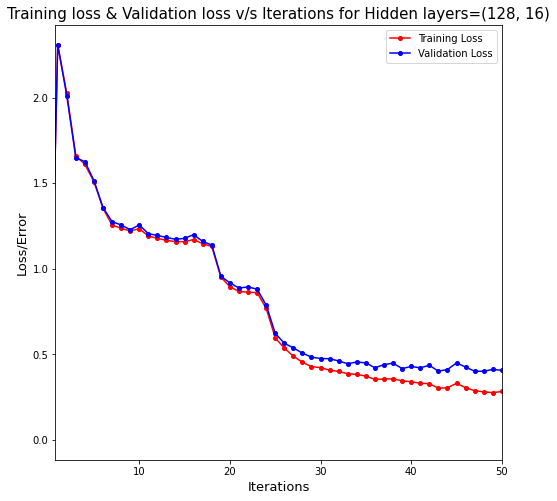

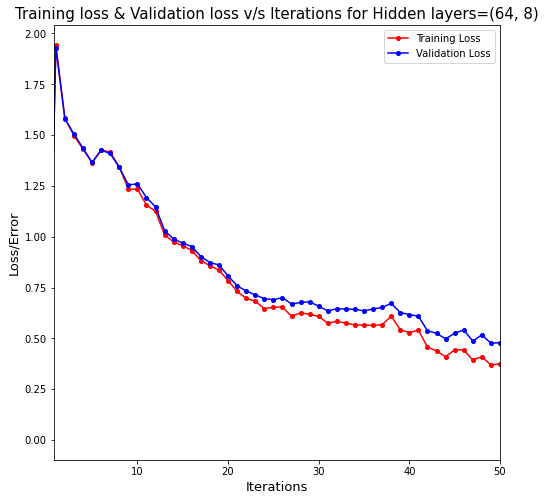

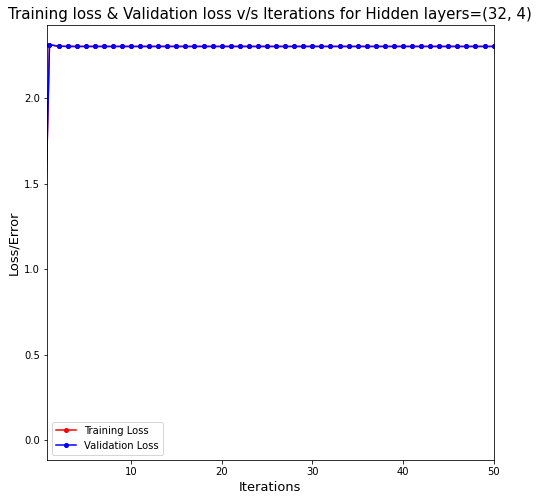

In [ ]:
def MLP_hidden_layers(hidden_layer, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu', learning_rate_init=0.001,
                        batch_size=batch_size)

    for epoch in range(epochs):    
        nsamples, nrows, ncols = x_train.shape
        mlp.partial_fit(x_train.reshape((nsamples, nrows*ncols)), y_train, classes=np.arange(10))
        
        nsamples, nrows, ncols = x_train.shape
        y_true = np.eye(10)[y_train]
        y_pred_proba = mlp.predict_proba(x_train.reshape((nsamples, nrows*ncols)))
        train_loss.append(log_loss(y_true, y_pred_proba))
        
        nsamples, nrows, ncols = x_valid.shape
        y_true = np.eye(10)[y_valid]
        y_pred_proba = mlp.predict_proba(x_valid.reshape((nsamples, nrows*ncols)))
        validation_loss.append(log_loss(y_true, y_pred_proba))

    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss', ms=4)
    plt.plot(validation_loss, 'b-o', label='Validation Loss', ms=4)
    plt.xlabel('Iterations', fontsize=13)
    plt.ylabel('Loss/Error', fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f'Training loss & Validation loss v/s Iterations for Hidden layers={hidden_layer}', 
                fontsize=15)
    plt.legend()
    plt.show()
    return mlp

epochs = 50
batch_size = 128
models_layer = []

for hidden_layer in ((128,16), (64,8), (32,4)):
    mlp = MLP_hidden_layers(hidden_layer, epochs, batch_size, train_image, train_label, valid_image, 
                                valid_label)
    models_layer.append(mlp)

In [ ]:
hidden_layer = ((128,16), (64,8), (32,4))

for i in range(len(hidden_layer)):
    print(f"==> Accuracy with hidden layer='{hidden_layer[i]}'")
    nsamples, nrows, ncols = train_image.shape
    print(f"Training Accuracy:", models_layer[i].score(train_image.reshape((nsamples, nrows*ncols)), 
                                                    train_label))
    nsamples, nrows, ncols = valid_image.shape
    print(f"Validation Accuracy:", models_layer[i].score(valid_image.reshape((nsamples, nrows*ncols)), 
                                                    valid_label))
    print()

==> Accuracy with hidden layer='(128, 16)'
Training Accuracy: 0.8987058823529411
Validation Accuracy: 0.8645555555555555

==> Accuracy with hidden layer='(64, 8)'
Training Accuracy: 0.873686274509804
Validation Accuracy: 0.8537777777777777

==> Accuracy with hidden layer='(32, 4)'
Training Accuracy: 0.10041176470588235
Validation Accuracy: 0.09766666666666667



In [ ]:
.

## Part (d)

In [15]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
    'hidden_layer_sizes': [(256,32), (128,16), (64,8), (32,4)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter' : [15,25,50]
}

mlp = MLPClassifier()
clf = GridSearchCV(mlp, grid_parameters, n_jobs=-1, cv=3)

nsamples, nrows, ncols = train_image.shape
# clf.fit(train_image.reshape((nsamples, nrows*ncols)), train_label)

In [17]:
import pickle
with open('gridsearch', 'wb') as pickle_in:
    pickle.dump(clf, pickle_in)

In [18]:
import pickle
with open('gridsearch', 'rb') as pickle_in:
    clf = pickle.load(pickle_in)
    print(clf)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(256, 32), (128, 16), (64, 8),
                                                (32, 4)],
                         'max_iter': [15, 25, 50], 'solver': ['sgd', 'adam']})


In [19]:
# Best parameter based on GridSearch
print('Best parameters found:\n')
print(clf.best_params_)

Best parameters found:

{'activation': 'relu', 'hidden_layer_sizes': (256, 32), 'max_iter': 50, 'solver': 'adam'}


In [20]:
print('Best accuracy recorded is: ', end=' ')
print(clf.best_score_)

Best accuracy recorded is:  0.8653333333333334


In [22]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.101 (+/-0.000) for {'activation': 'identity', 'hidden_layer_sizes': (256, 32), 'max_iter': 15, 'solver': 'sgd'}
0.792 (+/-0.025) for {'activation': 'identity', 'hidden_layer_sizes': (256, 32), 'max_iter': 15, 'solver': 'adam'}
0.101 (+/-0.000) for {'activation': 'identity', 'hidden_layer_sizes': (256, 32), 'max_iter': 25, 'solver': 'sgd'}
0.792 (+/-0.028) for {'activation': 'identity', 'hidden_layer_sizes': (256, 32), 'max_iter': 25, 'solver': 'adam'}
0.101 (+/-0.000) for {'activation': 'identity', 'hidden_layer_sizes': (256, 32), 'max_iter': 50, 'solver': 'sgd'}
0.802 (+/-0.035) for {'activation': 'identity', 'hidden_layer_sizes': (256, 32), 'max_iter': 50, 'solver': 'adam'}
0.101 (+/-0.000) for {'activation': 'identity', 'hidden_layer_sizes': (128, 16), 'max_iter': 15, 'solver': 'sgd'}
0.812 (+/-0.010) for {'activation': 'identity', 'hidden_layer_sizes': (128, 16), 'max_iter': 15, 'solver': 'adam'}
0.101 (+/-0.000) for {'activation': 'identity', 'hidden_layer_sizes': (128, 16), 'ma